## Data Download (Jesus)

In [1]:
#References

"""Request commands based on the code found in the documentation for Alphavantage/ 
    Link: https://www.alphavantage.co/documentation/"""
"""Validate function by jamylak in stack overflow \
    Link: https://stackoverflow.com/questions/16870663/how-do-i-validate-a-date-string-format-in-python/16870699"""
"""Some other references for pandas operations from pandas documentation \
    Link: https://pandas.pydata.org/docs/reference/frame.html"""

#HOW TO USE:
    #STEP 1: Get your alphavantage key
    #STEP 2: Look for a company symbol using symb_names()
    #Step 3: Return req_to_frame to obtain a dictionary. Assign it to a variable
    #Examples on line 109 and 110



#key: 7QJ0OD6RU5IEVRO4

import requests
import pandas as pd
import datetime

def req_list_symb():
    #Function that asks the user to input their key and a name
    #Returns a dictionary with a list of the companies 
    #with the most similar name
    key = input("Please feed me your key for Alphavantage : ")
    symbol_func = "SYMBOL_SEARCH"
    keywords = input("Tell me the company name: ")
    symbol_url = 'https://www.alphavantage.co/query?function={}&keywords={}&apikey={}'.format(
    symbol_func, keywords, key)
    req_symb = requests.get(symbol_url)
    comp_stock = req_symb.json()
    return comp_stock


def comp_list(comp_stock):
    #Prints out the search results for the company symbols request
    if len(comp_stock['bestMatches']) > 0:
        for company in comp_stock['bestMatches']:
            print("Company Symbol : ", company['1. symbol'], "\n",  
              "Company Name : ", company['2. name'], "\n",
              "Stock Type : ", company['3. type'], "\n", 
              "Region : ", company['4. region'], "\n")
        print("If you want to look for a stock info, please use the company symbol")
    else:
        print("No companies were found. Try again")
    

def symb_names():
    #Looking up a company's symbol
    comp_stock = req_list_symb()
    comp_list(comp_stock)
    
def validate(date_text):   
    #From jamylak
    #Validates the date format
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
def date_order(start_date, end_date):
    #Checks if the date range is valid
    if end_date <= start_date:
        raise Exception("Invalid date range. Please try again")

def date_slicer(stk_frame, stock_dict, stock, start_date, end_date):
    #Returns:
    #1. The Stock dictionary updated with the dataframe
    #It also produces a csv file per stock with the data
    try:
        date_frame = pd.DataFrame(stk_frame["Time Series (Daily)"], dtype = "float").T.sort_index()
    except KeyError:
        raise KeyError("Stock not found. Did you use the correct symbol? Please try again")
    sliced_frame = date_frame.loc[start_date:end_date]
    stock_dict[stock] = sliced_frame
    sliced_frame.to_csv("{} Data From {} to {}".format(stock, start_date, end_date))
    return stock_dict

def stock_query():
    #Asks the user for a key, date range, and stock 
    #and returns a dictionary with all the requested stocks
    stock_dict = {}
    key = input("Please feed me your key for Alphavantage : ")
    stock = input("Please feed me a company's stock name : ")
    start_date = input("Please feed me the starting date in YYYY-MM-DD format: ")
    validate(start_date)
    end_date = input("Please feed me the ending date in YYYY-MM-DD format: ")
    validate(end_date)
    date_order(start_date, end_date)
    funct = "TIME_SERIES_DAILY_ADJUSTED"
    while stock != "0" :
        stock_dict[stock] = 0  
        url = 'https://www.alphavantage.co/query?function={}&symbol={}&outputsize=full&apikey={}'.format(\
                                                  funct, stock, key)
        req_stk = requests.get(url)
        stk_frame = req_stk.json()
        stock_dict = date_slicer(stk_frame, stock_dict, stock, start_date, end_date)
        stock = input("Please feed me a company's stock name or 0 to quit: ")
    return stock_dict

    

    
def req_to_frame():
    #Putting all together
    stock_dict = stock_query()
    return stock_dict    
    


#symb_names()  
stock_dict = req_to_frame()

Please feed me your key for Alphavantage : 7QJ0OD6RU5IEVRO4
Please feed me a company's stock name : IBM
Please feed me the starting date in YYYY-MM-DD format: 2005-06-01
Please feed me the ending date in YYYY-MM-DD format: 2006-01-01
Please feed me a company's stock name or 0 to quit: AMZN
Please feed me a company's stock name or 0 to quit: 0


### Generate Date as a Floating Point Value

In [2]:
# Function is designed to generate a floating point value for each date in the stock data sets selected
from datetime import datetime
import copy

def _mutate_date_(stocks):
    for company in stocks: # Iterate over the different companies that the client has selected
        stocks[company].reset_index(inplace=True)
        dateTime = []
        for index,day in enumerate(stocks[company]["index"]):
            dateAsString = day
            stocks[company]["index"][index] = datetime.strptime(dateAsString, "%Y-%m-%d").timestamp()
        stocks[company]["index"] = pd.to_numeric(stocks[company]["index"], errors='coerce')
        stocks[company].rename(columns = {'index':'date'}, inplace = True)
    return stocks

stock_dict2 = _mutate_date_(copy.deepcopy(stock_dict))
stock_dict2["IBM"].describe(include='all')

<ipython-input-2-249e86e0f0ea>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks[company]["index"][index] = datetime.strptime(dateAsString, "%Y-%m-%d").timestamp()


,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
count,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.0
mean,1.126723e+09,81.491007,82.180007,81.018675,81.588725,49.809557,5.930574e+06,0.002685,1.0
std,5.335916e+06,3.782947,3.728643,3.783781,3.756369,2.354270,2.047914e+06,0.023093,0.0
min,1.117580e+09,73.830000,74.770000,73.450000,73.880000,45.000063,2.199300e+06,0.000000,1.0
25%,1.122246e+09,79.500000,80.270000,79.010000,79.540000,48.563787,4.424300e+06,0.000000,1.0
50%,1.126739e+09,81.990000,82.750000,81.600000,82.190000,50.181766,5.433200e+06,0.000000,1.0
75%,1.131322e+09,83.410000,84.000000,82.990000,83.480000,50.981393,6.870400e+06,0.000000,1.0
max,1.135901e+09,89.180000,89.940000,89.050000,89.210000,54.598895,1.414970e+07,0.200000,1.0


### Importing Libraries for OLS

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from datetime import datetime
import copy
sns.set()

#### Regression with  SKLearn V2

In [35]:
def sk_simple_OLS(stocks): # Generate a simple OLS regression model for one data set

    inputs, targets, x_train, x_test, y_train, y_test = gen_model(stocks)
    reg, predicted_v = model_OLS(inputs, x_train, y_train)

    test_result = sk_test_OLS(x_test, y_test, reg)
    plot_OLS(inputs, targets, predicted_v, reg)
    plot_yhat_v_y(x_train, y_train, reg)
    
    model= sm.OLS(y_train,x_train).fit()
    # print(model.summary()) # Show the user all the information regarding the data
    # print(test_result) # Show the user how the model performed on the test data
    RSME = sm.tools.eval_measures.rmse(predicted_v, targets, axis=0)
    R2 = reg.score(x_train,y_train)
    
    return RSME, R2, reg

def gen_model(stocks):
    # Import library to split the data into test and training values
    from sklearn.model_selection import train_test_split 
    t_size = float(input("Please select the Test Size as a decimal point: "))
    company = get_company(stocks)
    targets = stocks[company]['5. adjusted close']
    inputs = stocks[company]['date']
    inputs2 = sm.add_constant(inputs) # Transform the data to add the constant value
    x_train, x_test, y_train, y_test = train_test_split(inputs2, targets, test_size=t_size, random_state=365)
    return inputs, targets, x_train, x_test, y_train, y_test

def model_OLS(inputs, x_train, y_train):
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    predicted_v = inputs*reg.coef_[1]+reg.intercept_
    return reg, predicted_v

def get_company(stocks):
    company = input("For which company do you wish to make your analysis? \n" + str(stocks.keys()))
    return company

#model, test_results, RSME = sk_simple_OLS(stock_dict2)
#model.summary()
#print('The model\'s RSME is:', RSME )
#print(test_results)

In [36]:
# Plotting the results from the regression model vs. the original scatterplot of date vs. price
def plot_OLS(inputs, targets, predicted_v, reg):
    plt.scatter(inputs,targets)
    fig = plt.plot(inputs,predicted_v, lw=3, c='red', label ='OLS Regression')
    plt.title('Trend Line ' + company,fontsize=18)
    plt.xlabel('Time', fontsize = 10)
    plt.ylabel('Price', fontsize = 10)
    plt.show()

# Plot the values from the model vs. the real values
def plot_yhat_v_y(x_train, y_train, reg):
    y_hat = reg.predict(x_train)
    plt.scatter(y_train, y_hat)
    plt.title('Expected Results vs. Real Results',fontsize=18)
    plt.xlabel('Targets (y_train)',fontsize=10)
    plt.ylabel('Predictions (y_hat)',fontsize=10)
    plt.show() 

#### Testing

In [37]:
# This function is designed to test the model to new test data to guarantee the accuracy of the prediction
def sk_test_OLS(x_test, y_test, reg):
    pred_test = reg.predict(x_test) # Generate the prediction for the test data
    test_table = pd.DataFrame(pred_test, columns=['Prediction'])
    y_test = y_test.reset_index(drop=True) #Reset the index of y_test to match pred_test
    test_table['Target'] = y_test
    test_table['Residual'] = test_table['Target'] - test_table['Prediction'] # Calculate the residual
    test_table['Square Error'] = test_table['Residual'] * test_table['Residual'] # Calculate Square Error
    test_table['Difference%'] = np.absolute(test_table['Residual']/test_table['Target']*100)
    #pd.set_option('display.float_format', lambda x: '%.2f' % x)
    test_table.sort_values(by=['Difference%'])
    return test_table 


Please select the Test Size as a decimal point: 0.2
For which company do you wish to make your analysis? 
dict_keys(['IBM', 'AMZN'])AMZN


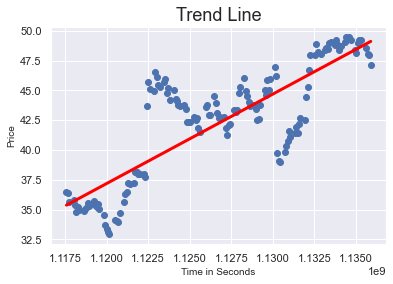

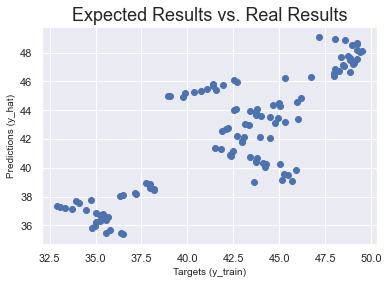

For which date do you wish to know the prediction? 
Please use YYYY-MM-DD format: 2006-06-06
The predicted value for  2006-06-06  is:  59.354465890998654
The coefficient of determination of the model is:  0.6981460624855566
The RSME for the model is:  2.719339072607147


In [38]:
def sk_predval_OLS(stocks):
    RSME, R2, reg = sk_simple_OLS(stocks)
    date = input("For which date do you wish to know the prediction? \nPlease use YYYY-MM-DD format: ")
    coef = datetime.strptime(date, "%Y-%m-%d").timestamp()
    pred_test = reg.intercept_+reg.coef_[1]*coef
    return pred_test, date, RSME, R2
pred_test, date, RSME, R2 = sk_predval_OLS(stock_dict2)
print("The predicted value for ", date, " is: ", pred_test)
print("The coefficient of determination of the model is: ", R2)
print("The RSME for the model is: ", RSME)

In [14]:
#inputs_scaled = scale_inputs(inputs) if you have more than 1 independent variable use scaling    
"""def scale_inputs(x_values):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(x_values)
    inputs_scaled = scaler.transform(x_values)
    return imputs_scaled"""

'def scale_inputs(x_values):\n    from sklearn.preprocessing import StandardScaler\n    scaler = StandardScaler()\n    scaler.fit(x_values)\n    inputs_scaled = scaler.transform(x_values)\n    return imputs_scaled'

#### Generate Visualizations

For which company do you wish to make your analysis? 
dict_keys(['IBM', 'AMZN'])AMZN


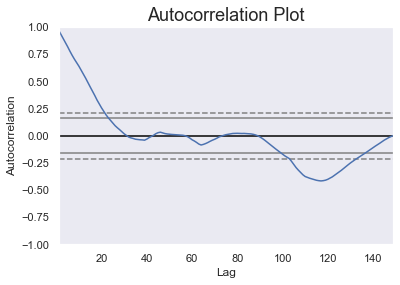

In [99]:
# Function to get the window for the data visualization
def get_window():
    win_size = int(input('Please Choose a Window Size for your moving average: '))
    return win_size

# Returns the Raw Time Series of the Selected Stock
def raw_time_series(stocks):
    company = get_company(stocks)
    price = stocks[company]['5. adjusted close']
    date = stocks[company]['date']
    plt.scatter(date,price)
    plt.title('Raw Time Series '+ company,fontsize=18)
    plt.xlabel('Time in Seconds', fontsize = 10)
    plt.ylabel('Adj. Closing Price', fontsize = 10)
    plt.show()
#raw_time_series(stock_dict2)

# Returns the trend line for the data series
def plot_trend_line(stocks):
    inputs, targets, x_train, x_test, y_train, y_test = gen_model(stocks)
    reg, predicted_v = model_OLS(inputs, x_train, y_train)
    plot_OLS(inputs, targets, predicted_v, reg)
#plot_trend_line(stock_dict2)

# Plot Moving Averages for Stocks given a Window Time
def moving_averages(stocks):
    company = get_company(stocks)
    win_size = get_window()
    price = stocks[company]['5. adjusted close']
    sma = price.rolling(window =win_size).mean()
    std = price.rolling(window =win_size).std()
    return sma, std, company, win_size

def plot_sma(stocks):
    sma, std, company, win_size = moving_averages(stocks)
    plt.title('SMA '+ company,fontsize=18)
    plt.xlabel('Days', fontsize = 10)
    plt.ylabel('Adj. Closing Price', fontsize = 10)
    plt.plot(stocks[company]['5. adjusted close'], label="Closing Prices")
    plt.plot(sma, label=str(win_size)+' Day SMA')
    plt.legend()
#plot_sma(stock_dict2)

# Plotting Bollinger Bands
def bollinger_band(stocks):
    sma, std, company, win_size = moving_averages(stocks)
    num_std = float(input('How many standard deviations away from the mean do you wish to calculate? '))
    upper_b = sma + std * num_std
    lower_b = sma - std * num_std
    return upper_b , lower_b, company

def plot_bollinger(stocks):
    upper_b , lower_b, company = bollinger_band(stocks)
    plt.title('Bollinger Band '+ company,fontsize=18)
    plt.xlabel('Days', fontsize = 10)
    plt.ylabel('Adj. Closing Price', fontsize = 10)
    plt.plot(stocks[company]['5. adjusted close'], label="Closing Prices")
    plt.plot(upper_b, label='Bollinger Up', c='g')
    plt.plot(lower_b, label='Bollinger Down', c='r')
    plt.legend()
    plt.show()
#plot_bollinger(stock_dict2)    

# Plot Weighted Moving Averages from Data Set
def wma(stocks):
    company = get_company(stocks)
    win_size = get_window()
    weights = np.array([(i+1)/sum(range(win_size+1)) for i in range(win_size)])
    stocks[company]['5. adjusted close'].rolling(window =win_size).apply(lambda x: np.sum(weights*x)).plot(label=company)
#wma(stock_dict2)

# Plot MACD of time series
# The code for MACD adapted for the project was obtained from https://medium.com/codex/algorithmic-trading-with-macd-in-python-1c2769a6ad1b
def obtain_macd(stocks):
    company = get_company(stocks)
    date = stocks[company]['date']
    price = stocks[company]['5. adjusted close']
    fema = float(input('Please enter the length of the fast EMA: '))
    sema = float(input('Please enter the length of the slow EMA: '))
    smooth = float(input('Please enter the period of the Signal line: '))
    fast = price.ewm(span = fema, adjust = False).mean()
    slow = price.ewm(span = sema, adjust = False).mean()
    macd = pd.DataFrame(fast - slow).rename(columns = {'5. adjusted close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [date, macd, signal, hist]
    macd_df = pd.concat(frames, join = 'inner', axis = 1)
    return macd_df, company

def plot_macd(stocks):
    macd_df, company = obtain_macd(stocks)
    price = stocks[company]['5. adjusted close']
    hist = macd_df['hist']
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(price)
    ax2.plot(macd_df['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(macd_df['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(price)):
        if str(hist[i])[0] == '-':
            ax2.bar(price.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(price.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')
#plot_macd(stock_dict2)

# Plot Relative Strength Index for the selected Stock
# The code was adapted to the program from https://tcoil.info/compute-rsi-for-stocks-with-python-relative-strength-index/
def obtain_rsi(stocks, company, date, price):
    win_size = get_window() 
    change = price.diff(1).dropna() # The changes will be calculated on a daily basis
    gain = 0 * change
    gain[change > 0] = change[change > 0]
    loss = 0 * change
    loss[change < 0] = change[change < 0]
    gain_avg = gain.ewm(com=win_size-1, min_periods=win_size).mean()
    loss_avg = loss.ewm(com=win_size-1, min_periods=win_size).mean()
    rsn = gain_avg/loss_avg # RSN esquals average gain over period divided by average loss in period
    RSI = 100 - (100/(1+abs(rsn)))
    return RSI

def plot_rsi(stocks):
    company = get_company(stocks)
    date = stocks[company]['date']
    price = stocks[company]['5. adjusted close']  
    stocks[company]['rsi'] = obtain_rsi(stocks, company, date, price)
    plt.title('Relative Strength Index '+company,fontsize=18)
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('RSI', fontsize = 10)
    plt.plot(date, stocks[company]['rsi'])
    plt.axhline(0, linestyle='--', alpha=0.1)
    plt.axhline(20, linestyle='--', alpha=0.5)
    plt.axhline(30, linestyle='--')

    plt.axhline(70, linestyle='--')
    plt.axhline(80, linestyle='--', alpha=0.5)
    plt.axhline(100, linestyle='--', alpha=0.1)
    plt.show()
#plot_rsi(stock_dict2)

def auto_correl(stocks):
    company = get_company(stocks)
    price = stocks[company]['5. adjusted close']
    graph = pd.plotting.autocorrelation_plot(price)
    plt.title('Autocorrelation Plot',fontsize=18)
    graph.plot()
    plt.show()
#auto_correl(stock_dict2)